<a href="https://colab.research.google.com/github/Amirthavanan/FUTURE_DS_03/blob/main/Analysis_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("student_feedback.csv")

# Quick overview
df.head()
df.info()
df.describe()


Saving student_feedback.csv to student_feedback.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for stude

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df_clean = df.drop(columns=["Unnamed: 0", "Student ID"])
df_clean.isnull().sum()

,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [ ]:
avg_scores = df_clean.mean().sort_values(ascending=False)
print(avg_scores)


Well versed with the subject                            7.497502
Explains concepts in an understandable way              6.081918
Use of presentations                                    5.942058
Provides support for students going above and beyond    5.662338
Structuring of the course                               5.636364
Course recommendation based on relevance                5.598402
Solves doubts willingly                                 5.474525
Degree of difficulty of assignments                     5.430569
dtype: float64


/tmp/ipython-input-3637565050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")


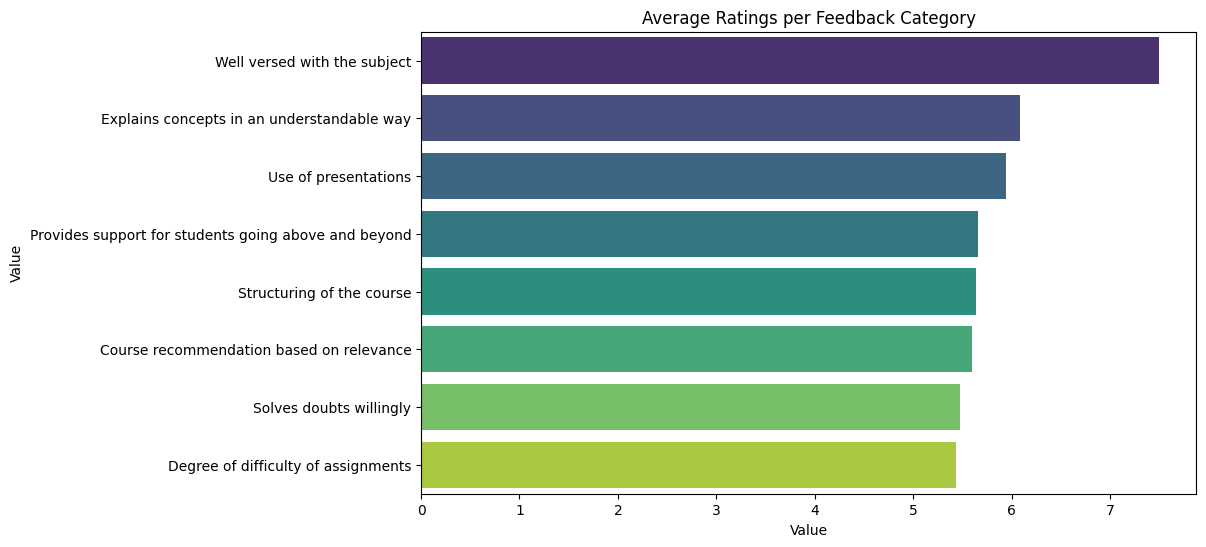

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="viridis")
plt.title("Average Ratings per Feedback Category")
plt.xlabel("Average Score")
plt.ylabel("Feedback Category")
plt.ylabel('Value')
plt.xlabel('Value')
plt.show()


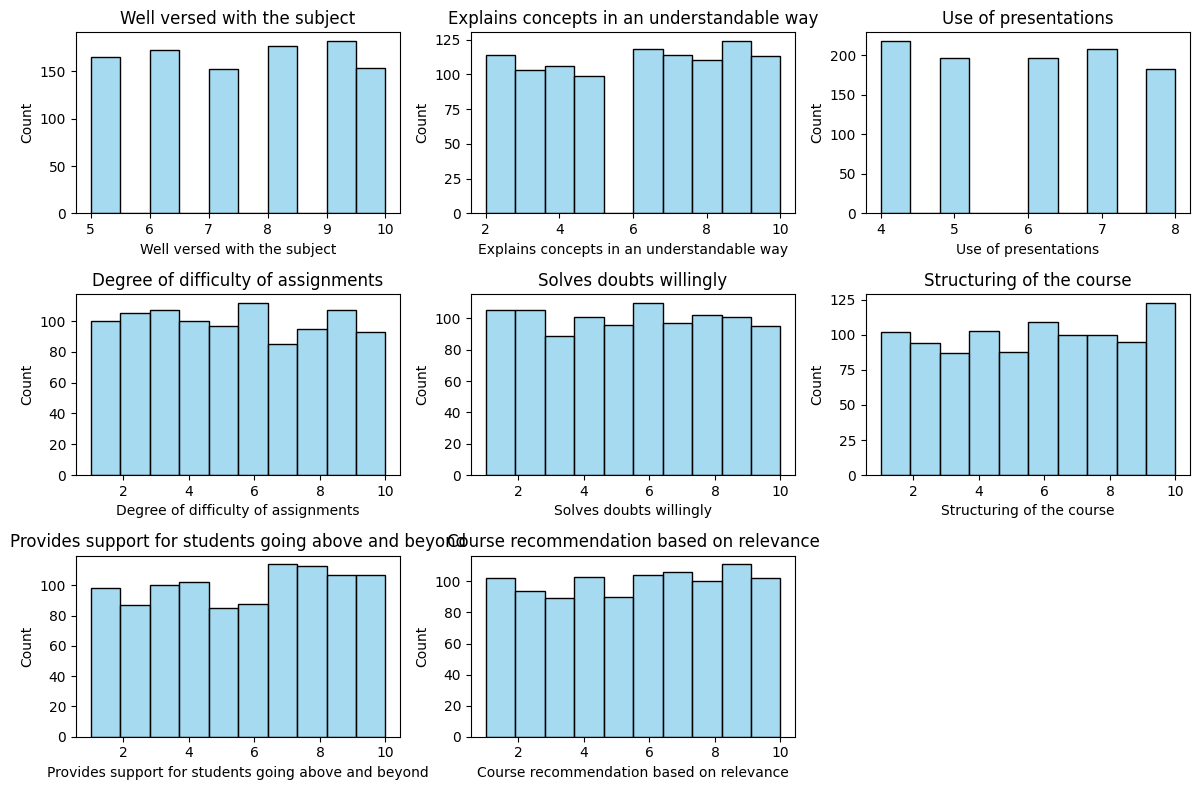

In [ ]:
plt.figure(figsize=(12,8))
for i, col in enumerate(df_clean.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df_clean[col], bins=10, kde=False, color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()


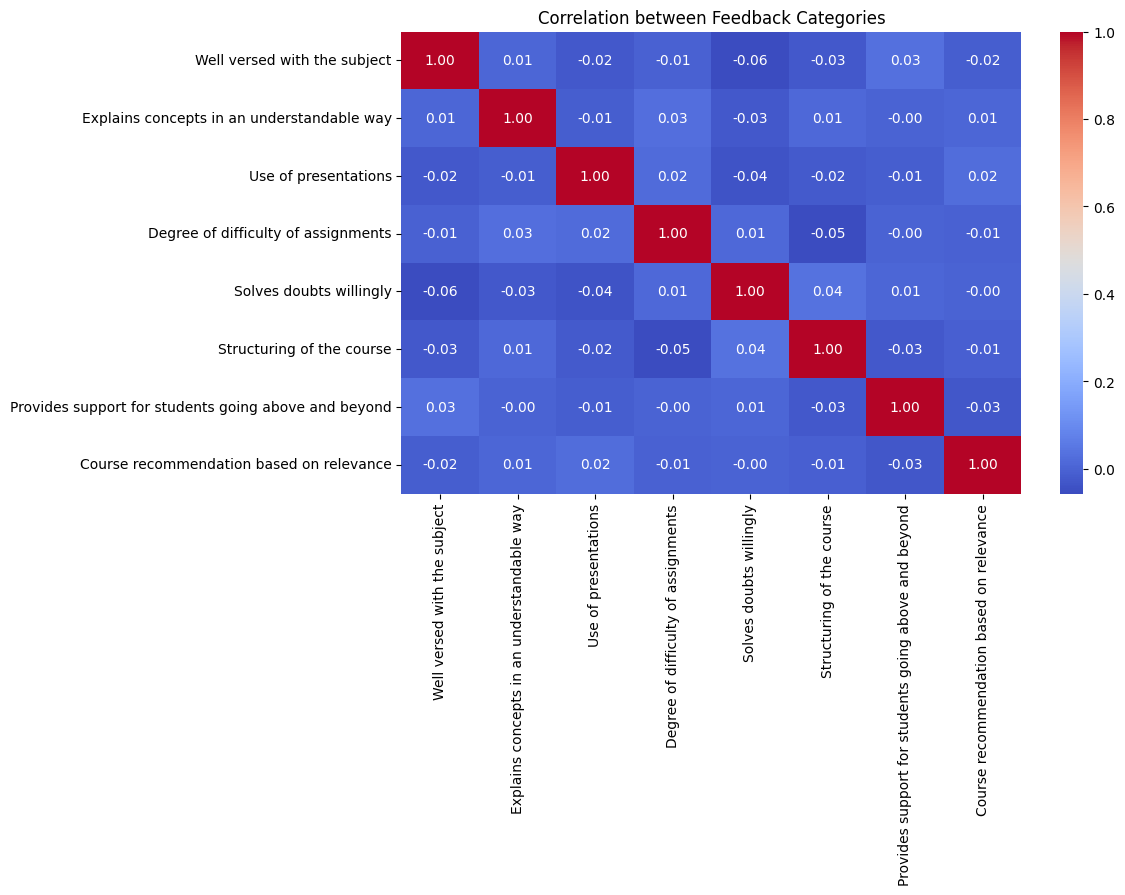

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Feedback Categories")
plt.show()


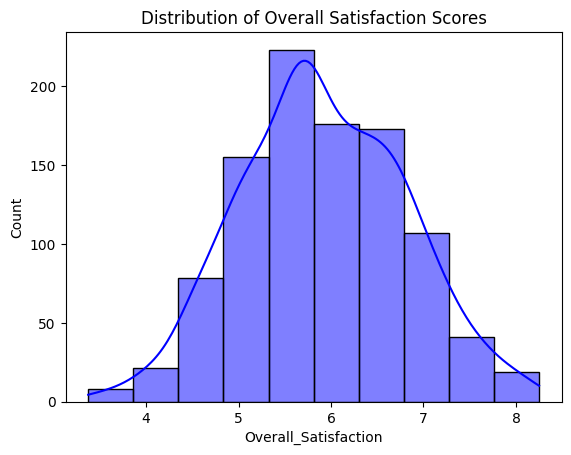

In [ ]:
df_clean["Overall_Satisfaction"] = df_clean.mean(axis=1)
sns.histplot(df_clean["Overall_Satisfaction"], bins=10, kde=True, color="blue")
plt.title("Distribution of Overall Satisfaction Scores")
plt.show()


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Load & minimal cleaning (adjust filename/path if needed)
df = pd.read_csv("/content/student_feedback.csv")   # or "/mnt/data/student_feedback.csv"
df = df.drop(columns=[c for c in ["Unnamed: 0","Student ID"] if c in df.columns])

# Ensure columns are numeric
df = df.apply(pd.to_numeric, errors="coerce")

# Add an overall satisfaction score (mean across the rating columns)
df["Overall_Satisfaction"] = df.mean(axis=1)

# Quick check
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Well versed with the subject,1001.0,7.497502,1.692998,5.000,6.00,8.000,9.000,10.00
Explains concepts in an understandable way,1001.0,6.081918,2.597168,2.000,4.00,6.000,8.000,10.00
Use of presentations,1001.0,5.942058,1.415853,4.000,5.00,6.000,7.000,8.00
Degree of difficulty of assignments,1001.0,5.430569,2.869046,1.000,3.00,5.000,8.000,10.00
Solves doubts willingly,1001.0,5.474525,2.874648,1.000,3.00,6.000,8.000,10.00
Structuring of the course,1001.0,5.636364,2.920212,1.000,3.00,6.000,8.000,10.00
Provides support for students going above and beyond,1001.0,5.662338,2.891690,1.000,3.00,6.000,8.000,10.00
Course recommendation based on relevance,1001.0,5.598402,2.886617,1.000,3.00,6.000,8.000,10.00
Overall_Satisfaction,1001.0,5.915460,0.894734,3.375,5.25,5.875,6.625,8.25


Top 3 aspects by mean:
                                                 mean  median       std
Well versed with the subject                7.497502     8.0  1.692998
Explains concepts in an understandable way  6.081918     6.0  2.597168
Use of presentations                        5.942058     6.0  1.415853


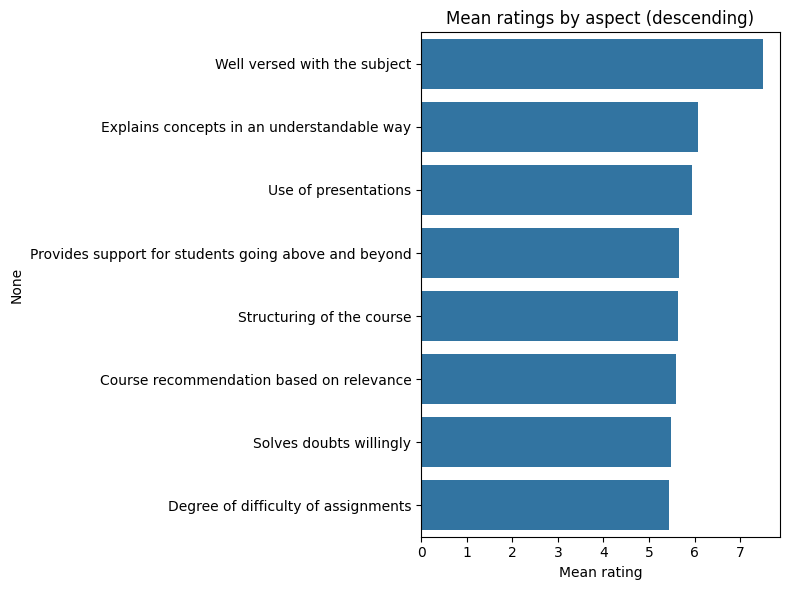

,mean,ci_low,ci_high
Well versed with the subject,7.498,7.392,7.603
Explains concepts in an understandable way,6.082,5.921,6.243
Use of presentations,5.942,5.854,6.030


In [ ]:
# 1. Compute summary stats
summary = df.drop(columns=["Overall_Satisfaction"]).agg(["mean","median","std","count"]).T
summary = summary.sort_values("mean", ascending=False)
summary["mean_rounded"] = summary["mean"].round(3)
summary.head(10)   # top 10 aspects by mean

# 2. Top-k aspects (e.g., top 3)
top_k = 3
top_aspects = summary.head(top_k)
print("Top", top_k, "aspects by mean:\n", top_aspects[["mean","median","std"]])

# 3. Plot horizontal bar chart of means
plt.figure(figsize=(8,6))
sns.barplot(x=summary["mean"], y=summary.index, orient="h")
plt.title("Mean ratings by aspect (descending)")
plt.xlabel("Mean rating")
plt.tight_layout()
plt.show()

# 4. Add 95% CI for mean using t-interval (if n large use normal approx)
def ci_mean(series, alpha=0.05):
    series = series.dropna()
    n = series.shape[0]
    mean = series.mean()
    se = series.std(ddof=1) / np.sqrt(n)
    t = stats.t.ppf(1-alpha/2, df=n-1)
    return mean - t*se, mean + t*se

summary["ci_low"], summary["ci_high"] = zip(*[ci_mean(df[col]) for col in summary.index])
summary[["mean","ci_low","ci_high"]].round(3).head(top_k)


Lowest rated aspects:
                                                         mean  median       std
Degree of difficulty of assignments                 5.430569     5.0  2.869046
Solves doubts willingly                             5.474525     6.0  2.874648
Course recommendation based on relevance            5.598402     6.0  2.886617
Structuring of the course                           5.636364     6.0  2.920212
Provides support for students going above and b...  5.662338     6.0  2.891690


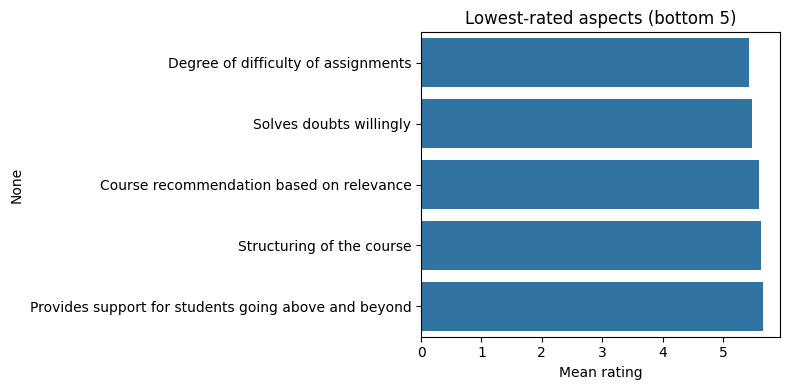

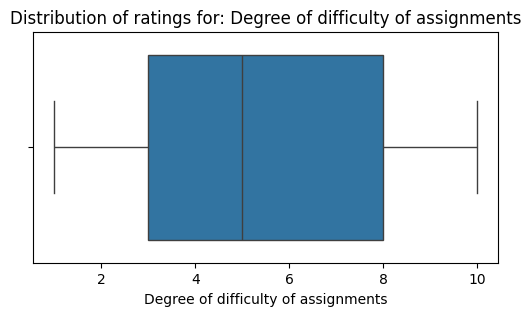

In [ ]:
# Sort ascending to find lowest
lowest = summary.sort_values("mean", ascending=True).head(5)
print("Lowest rated aspects:\n", lowest[["mean","median","std"]])

# Plot the bottom 5
plt.figure(figsize=(8,4))
sns.barplot(x=lowest["mean"], y=lowest.index, orient="h")
plt.title("Lowest-rated aspects (bottom 5)")
plt.xlabel("Mean rating")
plt.tight_layout()
plt.show()

# Inspect full distribution for the lowest column (example: first of lowest)
col = lowest.index[0]
plt.figure(figsize=(6,3))
sns.boxplot(x=df[col])
plt.title(f"Distribution of ratings for: {col}")
plt.show()


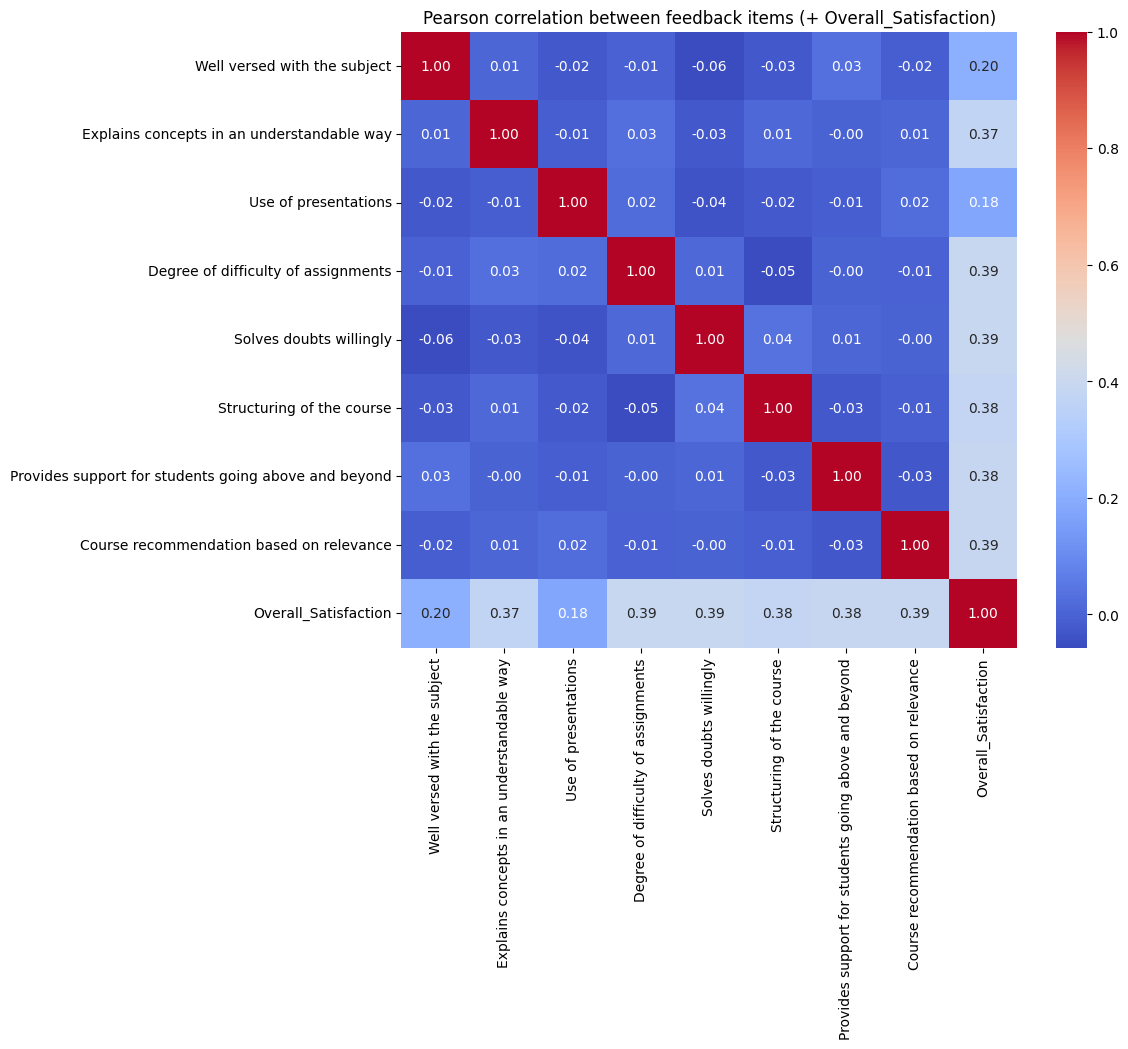

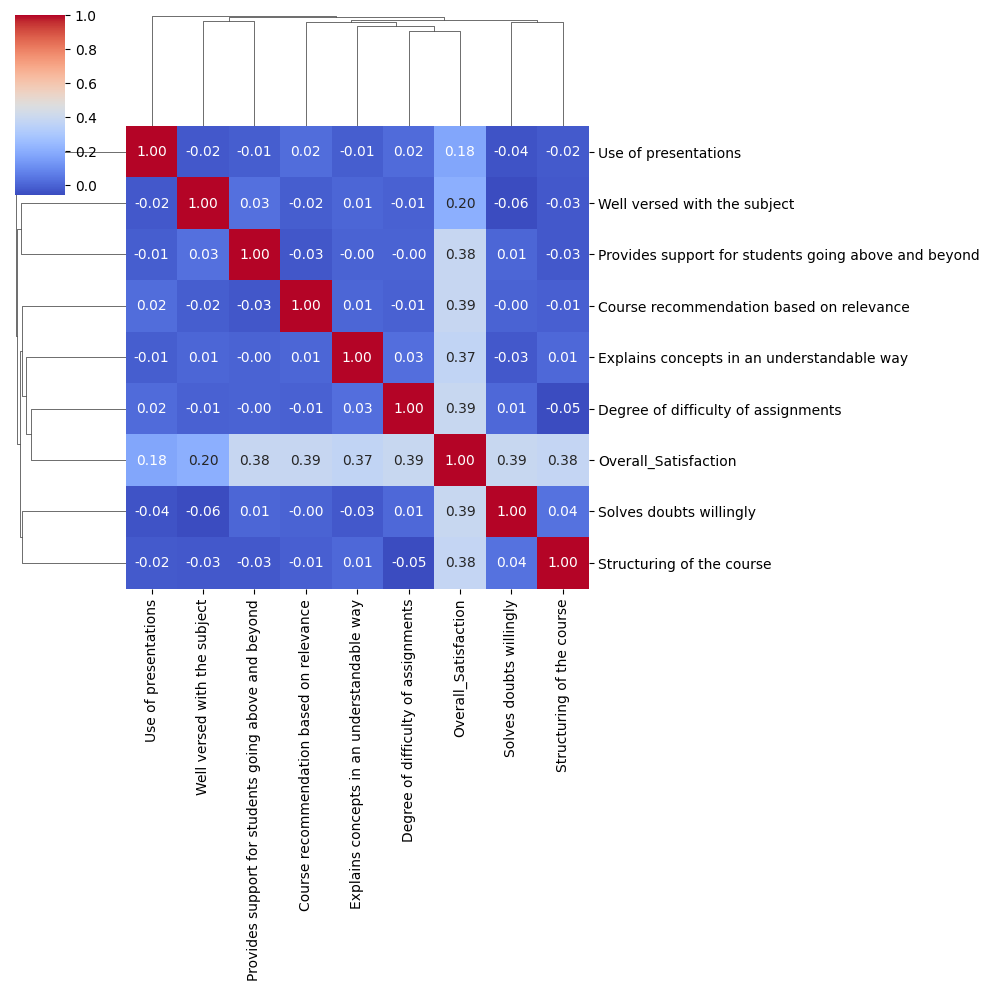

,aspect,pearson_r,p_value,p_bonferroni
3,Degree of difficulty of assignments,0.392695,2.974230e-38,2.379384e-37
4,Solves doubts willingly,0.392453,3.330050e-38,2.664040e-37
7,Course recommendation based on relevance,0.388351,2.221896e-37,1.777517e-36
6,Provides support for students going above and ...,0.384881,1.083550e-36,8.668399e-36
5,Structuring of the course,0.379754,1.087807e-35,8.702457e-35
1,Explains concepts in an understandable way,0.371296,4.473604e-34,3.578883e-33
0,Well versed with the subject,0.204551,6.453954e-11,5.163163e-10
2,Use of presentations,0.176207,2.000537e-08,1.600430e-07


In [ ]:
# 1. Correlation matrix (Pearson & Spearman)
cols = [c for c in df.columns if c != "Overall_Satisfaction"]
pearson_corr = df[cols + ["Overall_Satisfaction"]].corr(method="pearson")
spearman_corr = df[cols + ["Overall_Satisfaction"]].corr(method="spearman")

# 2. Visualize heatmap (Pearson)
plt.figure(figsize=(10,8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Pearson correlation between feedback items (+ Overall_Satisfaction)")
plt.show()

# 3. Clustered heatmap to see groupings
sns.clustermap(pearson_corr, annot=True, fmt=".2f", metric="euclidean", cmap="coolwarm", figsize=(10,10))
plt.show()

# 4. Correlation of each aspect with Overall_Satisfaction + p-values
results = []
for col in cols:
    r, p = stats.pearsonr(df[col].dropna(), df["Overall_Satisfaction"].dropna())  # pairwise
    results.append((col, r, p))
corr_df = pd.DataFrame(results, columns=["aspect","pearson_r","p_value"])
# adjust p-values for multiple testing (FDR or Bonferroni)
corr_df["p_bonferroni"] = multipletests(corr_df["p_value"], method="bonferroni")[1]
corr_df = corr_df.sort_values("pearson_r", ascending=False)
corr_df


                    count  proportion
Satisfaction_Label                   
Satisfied             991        99.0
Neutral                10         1.0


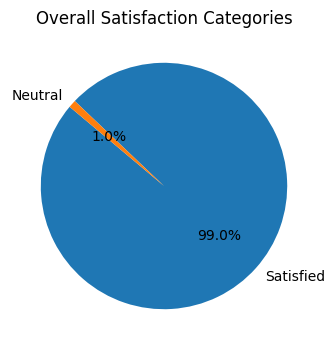

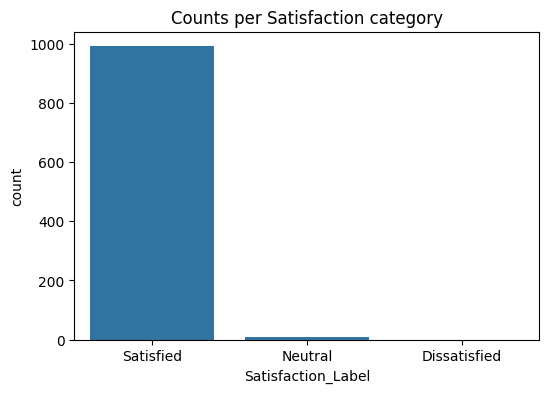

In [ ]:

def categorize_overall(x):
    if x >= 4.0:
        return "Satisfied"
    elif x >= 3.0:
        return "Neutral"
    else:
        return "Dissatisfied"

df["Satisfaction_Label"] = df["Overall_Satisfaction"].apply(categorize_overall)

pct = df["Satisfaction_Label"].value_counts(normalize=True).mul(100).round(2)
counts = df["Satisfaction_Label"].value_counts()
print(pd.concat([counts, pct], axis=1).rename(columns={0:"Percentage"}))

plt.figure(figsize=(6,4))
plt.pie(pct, labels=pct.index, autopct="%1.1f%%", startangle=140)
plt.title("Overall Satisfaction Categories")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Satisfaction_Label", data=df, order=["Satisfied","Neutral","Dissatisfied"])
plt.title("Counts per Satisfaction category")
plt.show()


/tmp/ipython-input-2055563949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=summary.values, y=summary.index, palette="viridis")


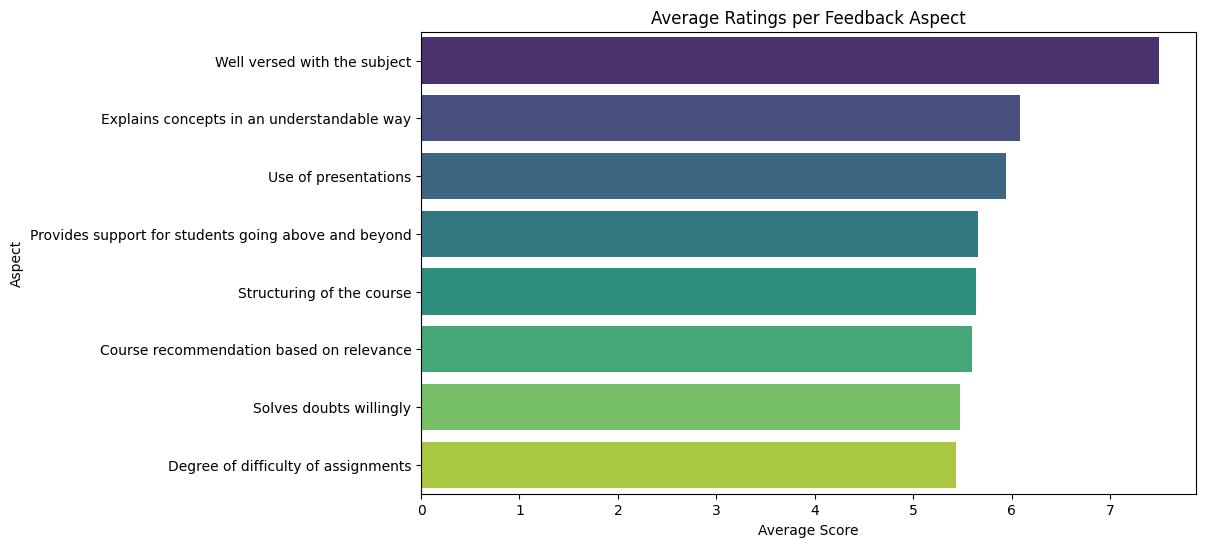

In [ ]:
#Average Ratings by Aspect (bar chart)
plt.figure(figsize=(10,6))
sns.barplot(x=summary.values, y=summary.index, palette="viridis")
plt.title("Average Ratings per Feedback Aspect")
plt.xlabel("Average Score")
plt.ylabel("Aspect")
plt.show()


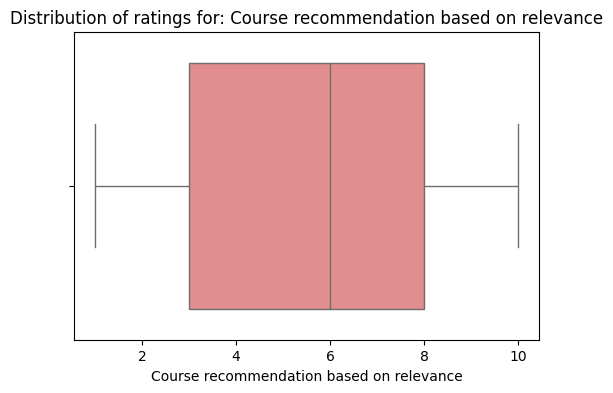

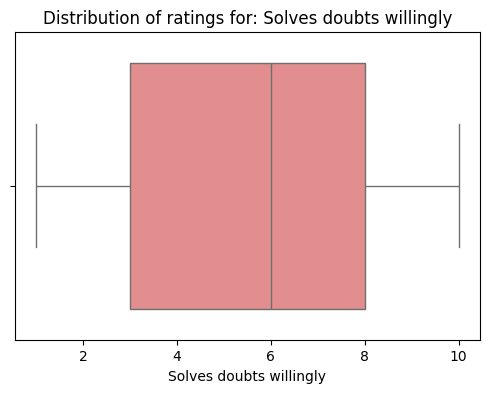

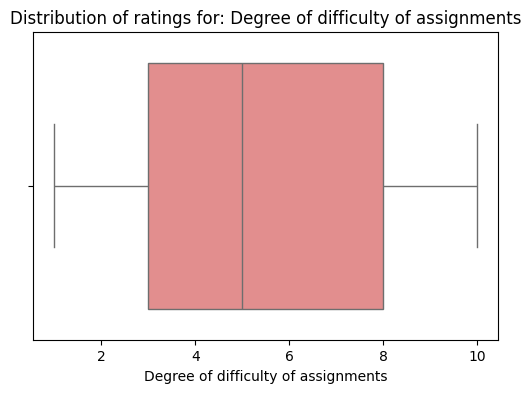

In [ ]:
#box plots for weak aspects
for aspect in bottom_aspects.index:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[aspect], color="lightcoral")
    plt.title(f"Distribution of ratings for: {aspect}")
    plt.show()
